In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [8]:
dataFrame = pd.read_csv("C:\\Users\Mustafa Baki\\Desktop\Python Dosyalari\\HandsOnMachineLearning\\chapter8\Mall_Customers.csv", sep = ",")
dataFrame.head(20) 

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Mustafa Baki\AppData\Local\Temp\ipykernel_5840\2621918644.py:1: SyntaxWarning: invalid escape sequence '\M'
  dataFrame = pd.read_csv("C:\\Users\Mustafa Baki\\Desktop\Python Dosyalari\\HandsOnMachineLearning\\chapter8\Mall_Customers.csv", sep = ",")


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [13]:
annual_spending = dataFrame[["Annual Income (k$)", "Spending Score (1-100)"]]
annual_spending.head(20) 

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [17]:
from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler() 
annual_spending_scaler = std_scl.fit_transform(annual_spending)
annual_spending_scaler

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [18]:
from sklearn.cluster import KMeans

kmeans_score_memory = []

for k in range(1, 11): 
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(annual_spending_scaler)
    kmeans_score_memory.append(kmeans.inertia_)

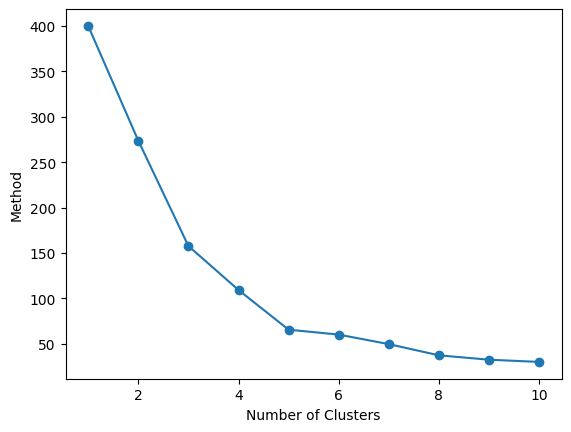

In [19]:
plt.plot(range(1, 11), kmeans_score_memory, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Method")
plt.show() 

In [20]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(annual_spending_scaler)

clusters = kmeans.labels_ 
clusters[:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

In [23]:
dataFrame["Cluster"] = clusters
dataFrame.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters,Cluster
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,4,4


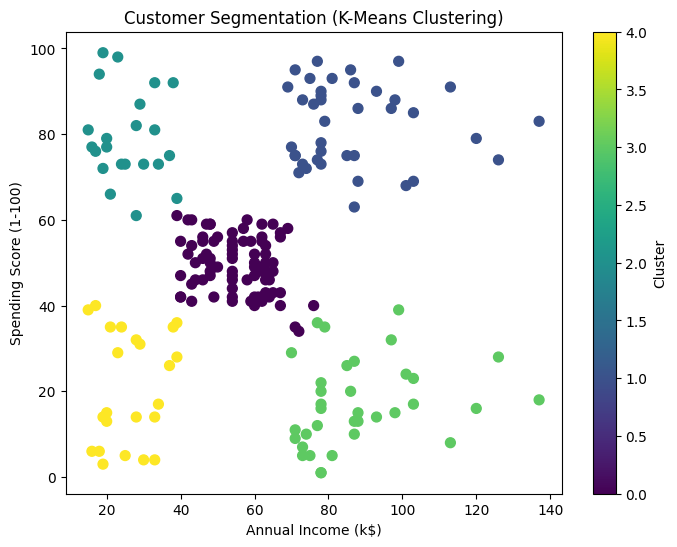

In [24]:
plt.figure(figsize=(8,6))

plt.scatter(
    dataFrame['Annual Income (k$)'],
    dataFrame['Spending Score (1-100)'],
    c = dataFrame['Cluster'],
    cmap='viridis',
    s=50
)

plt.title("Customer Segmentation (K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.colorbar(label='Cluster')
plt.show() 